<a href="https://colab.research.google.com/github/Kent7474/Proyecto_Seminario/blob/v2/An%C3%A1lisis_de_activos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DE LIBRERÍAS

In [43]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Frameworks principales
import pandas as pd
import numpy as np

# from pandas_datareader import data as pdr #No está funcionando
import yfinance as yf

# Frameworks secundarios
from datetime import datetime
from datetime import timedelta
    # Visualización
import matplotlib.pyplot as plt
import statistics
import seaborn as sns




In [2]:
pd.options.display.max_columns = 50
pd.set_option('display.max_colwidth', 15)


# DEFINICIÓN DE ACTIVOS Y FECHAS

## Periodos - Fecha inicio y fin

In [3]:
 #  YYYY-mm-dd
fechaInicio = "2020-01-01"
#today = "2022-11-01"
today = datetime.today().strftime('%Y-%m-%d')

In [4]:
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "ENPH", "META", "PEP", "TSLA", "V", "CAR", "TTD", "AMGN", "AAL", "TMUS", "CPRX", "ICPT"]
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "V"]
#activos = ["RIOT", "WKHS", "SPCE", "OSTK", "TSLA", "PLUG", "ZM", "QS", "BYND", "XPEV"]
#activos = ["RIOT", "WKHS", "SPCE", "OSTK", "TSLA", "PLUG", "ZM", "QS", "BYND", "XPEV", "AAPL", "MSFT", "AMZN", "GOOGL", "FB", "JNJ", "V", "DIS", "PFE", "KO"]

''' NASDAQ, más rendimiento a mayor riesgo'''
activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC"] # ESTAAAA

#activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC", "HON","GFS", "FISV", "FAST", "EXC", "CSX", "CRWD", "COST", "MELI", "META", "MRVL", "MAR", "LULU", "HON", "GFS" ]
#activos = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'JNJ', 'PG', 'V', 'JPM', 'KO', 'PEP', 'XOM', 'CVX', 'T', 'VZ', 'INTC', 'CSCO', 'ADBE', 'CRM', 'ABT', 'AMGN', 'UNH', 'PFE', 'MRK', 'BMY', 'RTX', 'LMT', 'GS', 'MA']


''' Excel facu '''
#activos = ['FNKO', 'PEP', 'MCD', 'SONY', 'DIS', 'CMCSA', 'NTDOY', 'CCOEY', 'MDLZ', 'GME']

'''Excel práctica en clase '''
#activos = ['TSLA', 'META', 'AAPL', 'AMZN', 'NFLX']

len(activos)

8

# DESCARGA Y VISUALIZACIÓN DE RENDIMIENTOS.
(Columna 'Adj Close') desde Yahoo Finance.

In [5]:
''' Con la función yf.download descargamos los rendimientos de cada activo
    según las fechas dadas (fechaInicio y today). De todas las columnas que
    nos trae, nos quedamos con 'Adj Close' '''
dataSet = yf.download(activos, start=fechaInicio, end=today)['Adj Close']
#dataSet = yf.download(activos, start=fechaInicio, end=today, interval='1mo')['Adj Close']

''' Revisamos los primero y los últimos 3 registros del DataFrame,
     para asegurarnos que tenga datos.'''
display(dataSet)
pd.DataFrame(dataSet).to_excel("DataSet.xlsx")
#display(dataSet.head(3))
#display(dataSet.tail(3))

[*********************100%***********************]  8 of 8 completed


,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Date,,,,,,,,
2020-01-02,334.429993,49.099998,294.239990,54.760342,NaN,31.850000,329.809998,59.754223
2020-01-03,331.809998,48.599998,290.850006,54.094299,NaN,31.639999,325.899994,58.797794
2020-01-06,333.709991,48.389999,290.820007,53.941284,NaN,31.690001,335.829987,59.044361
2020-01-07,333.390015,48.250000,290.089996,53.041206,NaN,31.844999,330.750000,59.759190
2020-01-08,337.869995,47.830002,292.660004,53.077213,NaN,31.910000,339.260010,59.871288
...,...,...,...,...,...,...,...,...
2023-06-16,495.179993,120.080002,297.480011,36.369999,6.48,58.450001,431.959991,426.920013
2023-06-20,485.859985,118.930000,293.790009,35.000000,6.32,58.360001,434.700012,438.079987
2023-06-21,477.480011,112.110001,294.359985,32.900002,6.05,58.410000,424.450012,430.450012


In [6]:
dataSet.max()

ADBE    688.369995
AMD     161.910004
BIIB    414.709991
INTC     63.348774
LCID     58.049999
MNST     59.939999
NFLX    691.690002
NVDA    438.079987
dtype: float64

### Gráfico de precios de períodos

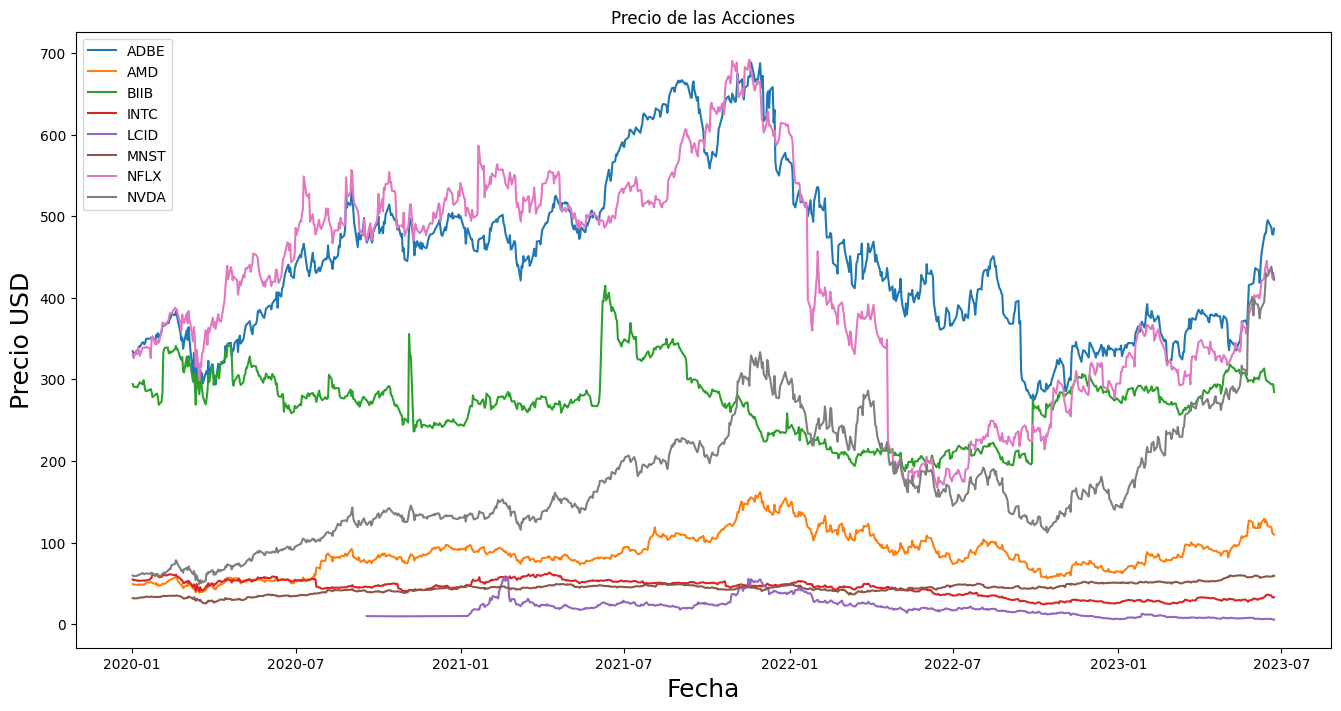

In [7]:
plt.figure(figsize=(16.2, 8))
for i in dataSet.columns.values:
    plt.plot(dataSet[i], label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio USD', fontsize=18)
plt.legend(dataSet.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=200, bbox_inches='tight')
plt.show()


### Calculamos el rendimiento de cada acción con el periodo anterior

In [8]:
''' Divide el valor de cada columna (df) por la columna anterior (df.shift(1))
    Luego le resta -1 para obtener el rendimiento.'''
rendimiento = (dataSet / dataSet.shift(1) -1).dropna()
rendimiento.head() * 100

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Date,,,,,,,,
2020-09-21,1.730302,4.017085,-2.251539,-0.340735,-0.303344,-0.772250,3.700318,2.690897
2020-09-22,2.342104,-0.307936,1.662327,0.462575,0.202844,1.084468,0.783832,0.962672
2020-09-23,-3.367021,-3.822386,-0.205308,-2.262262,-0.303641,-1.817496,-4.185929,-4.067180
2020-09-24,-0.578244,1.458579,-0.793535,0.696449,-0.812182,0.269956,0.524851,1.849680
2020-09-25,2.589430,2.954363,1.199819,1.586657,0.409416,1.012822,2.071535,4.257766


### Calculo de esperanza, varianza y desvío estandar

In [9]:
esp_var_desv = pd.DataFrame(rendimiento.mean() *100, columns=["Esperanza"])

esp_var_desv = esp_var_desv.T
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.var(ddof=0), columns=["Varianza"]).T)
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.std(ddof=0)*100, columns=["STD"]).T)
esp_var_desv

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Esperanza,0.032809,0.107900,0.057680,-0.020874,0.095223,0.069713,0.038880,0.236974
Varianza,0.000545,0.001053,0.001172,0.000517,0.003707,0.000232,0.001015,0.001167
STD,2.334176,3.245438,3.423606,2.273607,6.088199,1.523349,3.185473,3.415697


### Distribución de rendimientos

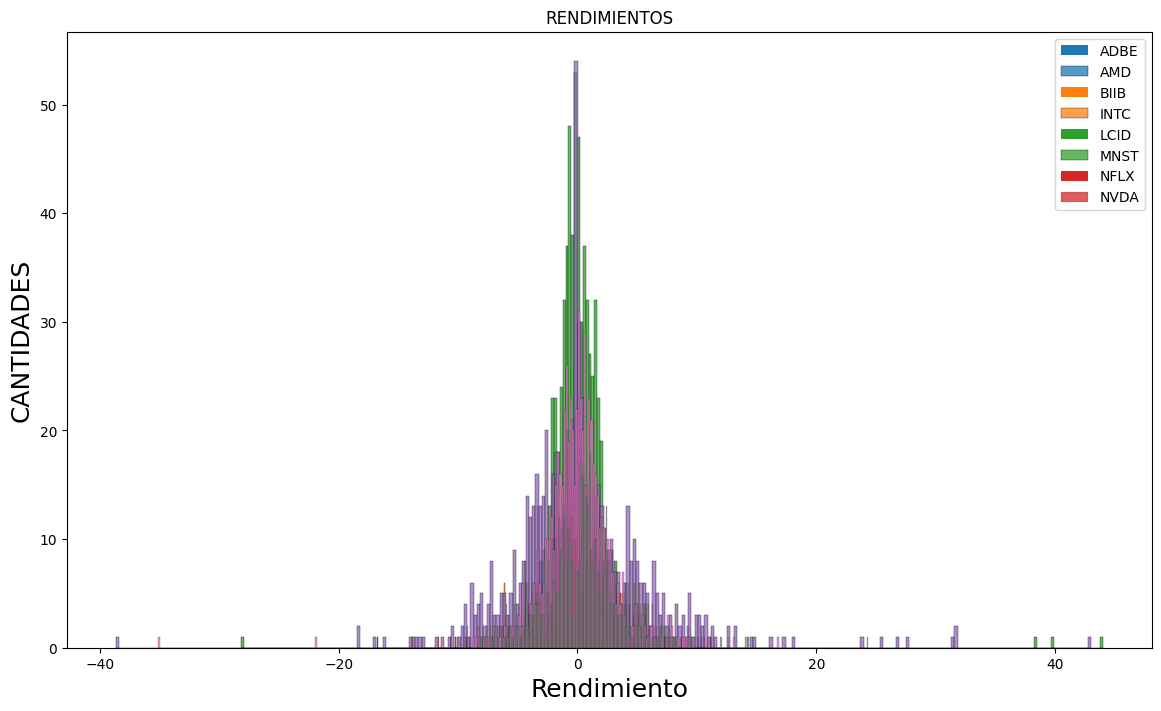

In [10]:
plt.figure(figsize=(14, 8))
for i in rendimiento.columns.values:
    #plt.hist(rendimiento[i]*100, label = i, bins=300)
    sns.histplot(rendimiento[i]*100, label=i, bins=300)
plt.title('RENDIMIENTOS')
plt.xlabel('Rendimiento', fontsize=18)
plt.ylabel('CANTIDADES', fontsize=18)
plt.legend(rendimiento.columns.values, loc='upper left')
plt.legend(rendimiento.columns.values)
#eliminamos los extremos con menos cantidad de datos.
#plt.xlim(-20,20)
plt.show()

### Matriz de covarianzas.
Valor que refleja en cómo varían dos variables de forma conjunta respecto a sus medias.

In [11]:
mCovarianza = rendimiento.cov(ddof=0, numeric_only=False)
cm = sns.light_palette("green", as_cmap=True)
mCovarianza.style.background_gradient(cmap=cm)

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
ADBE,0.000545,0.000468,0.000210,0.000237,0.000391,0.000173,0.000366,0.000536
AMD,0.000468,0.001053,0.000223,0.000376,0.000676,0.000176,0.000455,0.000891
BIIB,0.000210,0.000223,0.001172,0.000137,0.000288,0.000126,0.000246,0.000261
INTC,0.000237,0.000376,0.000137,0.000517,0.000310,0.000124,0.000251,0.000379
LCID,0.000391,0.000676,0.000288,0.000310,0.003707,0.000172,0.000464,0.000661
MNST,0.000173,0.000176,0.000126,0.000124,0.000172,0.000232,0.000133,0.000220
NFLX,0.000366,0.000455,0.000246,0.000251,0.000464,0.000133,0.001015,0.000514
NVDA,0.000536,0.000891,0.000261,0.000379,0.000661,0.000220,0.000514,0.001167


### Carga de pruebas de WEIGHT, Rendimiento y riesgo del portafolio

#### Se definen 3 arrays
- PesosPortafolio = pesos randoms con cantidad de elementos igual al numero de activos.
- rportafolio = Rendimiento del portafolio
- sdPortafolio = desvio standard, o riesgo del portafolio

In [12]:
pesosPortafolio = []
rPortafolio = []
sdPortafolio = []

#guardamos la cantidad de activos que tenemos para el análisis.
nrosActivos = len(rendimiento.columns)
nrosActivos

8

In [13]:
for x in range(5000):
    pesos = np.random.random(len(rendimiento.columns)) # Arreglo de 1 x la cantidad de activos
    # Dividir por la suma total de los números
    pesos /= np.sum(pesos)
    # Agrega cada prueba a la matriz
    pesosPortafolio.append(pesos)

    # Retorno la "sumaProducto" o el producto de la matriz
    # con los porcentajes de inversion X el rendimiento de cada activo
    rPortafolio.append(np.dot(rendimiento.mean(), pesos)) # rendimiento.mean() = matriz de 7X1

    # np.dot(mCovarianzas, pesos)  retorna matriz 1X7 de multiplicar los
    # pesos(porcentaje a invertir) y la matriz de covarianzas
    # A esa matriz de 1X7 de varianzas, la vuelvo a multiplicar por pesos.T
    # eso nos devuelve un solo resultado, la varianza de la inversion y
    # posteriormente el STD
    sdPortafolio.append(np.sqrt(
        np.dot(pesos.T, np.dot(mCovarianza, pesos))
    ))

#### Ejemplo
Para la primera distribución de la inversión en % en los 7 activos:

In [14]:
for i in range(len(pesosPortafolio[0])):
    print(rendimiento.columns[i],' -> ', round(pesosPortafolio[0][i]*100,2), '%')

ADBE  ->  7.02 %
AMD  ->  14.34 %
BIIB  ->  12.22 %
INTC  ->  15.73 %
LCID  ->  5.31 %
MNST  ->  21.37 %
NFLX  ->  1.69 %
NVDA  ->  22.33 %


Va a tener el siguiente rendimiento:

In [15]:
str(round(rPortafolio[0], 5)*100) + ' %'

'0.095 %'

Tiene el siguiente riesgo (%):

In [16]:
str(round(sdPortafolio[0], 3)*100) + ' %'

'2.0 %'

###Generación de diccionarios
A partir de estas 3 variables, vamos a buscar minimizar el riesgo y maximizar el retorno
Generamos un diccionario de listas -> lista de rendimiento, riesgo y una lista para cada acción con sus porcentajes de inversión

In [17]:
diccionario = {'Rendimiento': rPortafolio, 'Riesgo': sdPortafolio}
for i, accion in enumerate(rendimiento.columns.tolist()):
    diccionario['USD ' + accion] = [w[i] for w in pesosPortafolio]

Generamos un DataFrame a partir del diccionario para tener las inversiones, riesgo y rendimiento en una sola linea

In [18]:
matrizPortafolio = pd.DataFrame(diccionario)
matrizPortafolio

,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
0,0.000951,0.020045,0.070236,0.143433,0.122176,0.157266,0.053081,0.213666,0.016850,0.223291
1,0.000846,0.019662,0.121333,0.188907,0.085521,0.122275,0.004702,0.211279,0.102666,0.163318
2,0.000849,0.023023,0.133307,0.176869,0.030990,0.093937,0.149147,0.108595,0.166322,0.140833
3,0.000920,0.022345,0.005351,0.230384,0.117062,0.086509,0.057619,0.096892,0.234452,0.171731
4,0.000494,0.020896,0.191030,0.180373,0.152197,0.190968,0.093230,0.010171,0.170886,0.011147
...,...,...,...,...,...,...,...,...,...,...
4995,0.001027,0.022099,0.096035,0.183871,0.052507,0.191821,0.041734,0.128416,0.023319,0.282297
4996,0.000761,0.022367,0.026426,0.245877,0.217262,0.125207,0.054774,0.006663,0.220094,0.103697
4997,0.000538,0.018587,0.216398,0.237039,0.030461,0.167556,0.020742,0.226904,0.095165,0.005736
4998,0.000911,0.023011,0.155652,0.197487,0.022213,0.088763,0.091179,0.078339,0.180015,0.186352


## Frontera Eficiente
A continuación tenemos todas las carteras posibles con sus Riesgos y Rendimientos.

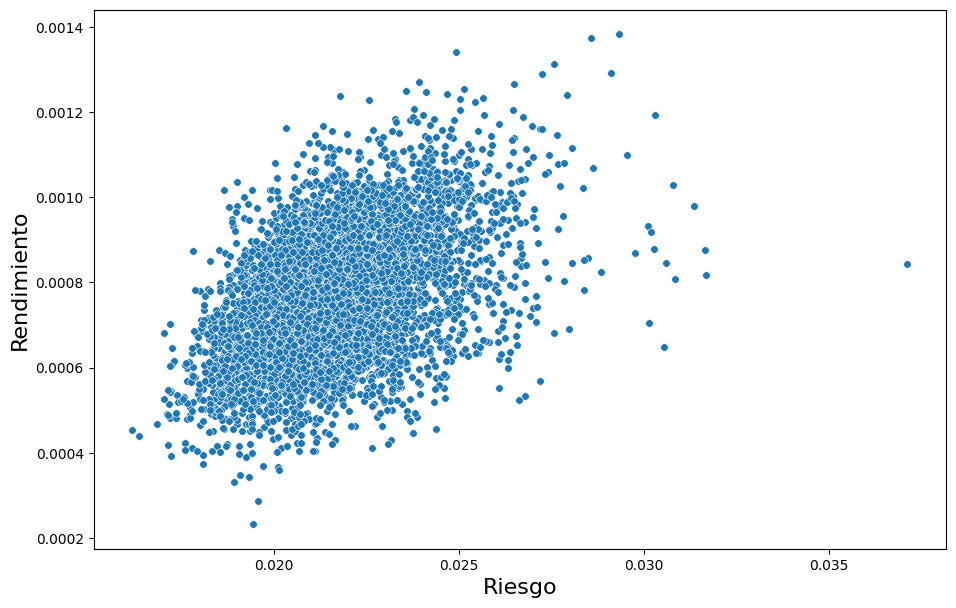

In [19]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

# ANÁLISIS

### Mínima Varianza
Buscamos el menor riesgo. Las carteras eficientes en las cuales deberíamos invertir, debe tener riesgo mayor a la mínima varianza, pero siempre mayor rendimiento.
En el siguiente gráfico están ubicadas por encima de la línea punteada.

In [20]:
minimaVarianza = matrizPortafolio.iloc[matrizPortafolio['Riesgo'].idxmin()]
display(minimaVarianza)
display(minimaVarianza.loc["Rendimiento"]*100)

Rendimiento    0.000453
Riesgo         0.016163
USD ADBE       0.164109
USD AMD        0.047186
USD BIIB       0.106995
USD INTC       0.199680
USD LCID       0.002448
USD MNST       0.319462
USD NFLX       0.139414
USD NVDA       0.020706
Name: 3512, dtype: float64

0.045309904736737384

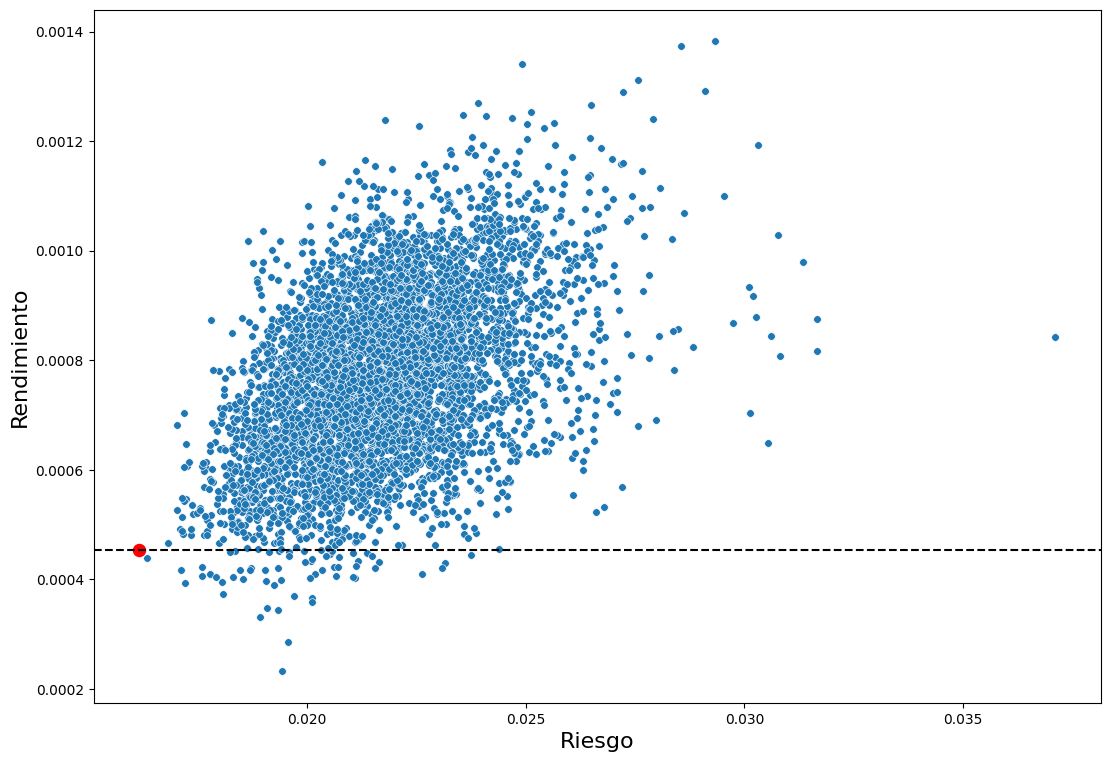

In [21]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

### Mayor rendimiento
Buscamos la inversión con mayor rendimiento de las pruebas.
A partir de este punto, todos los que se encuetran a la derecha de la línea punteada, serán irrelevantes porque tienene menor rendimiento y mayor riesgo.


In [22]:
mayorRendimiento = matrizPortafolio.loc[matrizPortafolio['Rendimiento'].idxmax()]
mayorRendimiento

Rendimiento    0.001383
Riesgo         0.029328
USD ADBE       0.095159
USD AMD        0.074097
USD BIIB       0.065544
USD INTC       0.012640
USD LCID       0.264916
USD MNST       0.008487
USD NFLX       0.079502
USD NVDA       0.399655
Name: 4218, dtype: float64

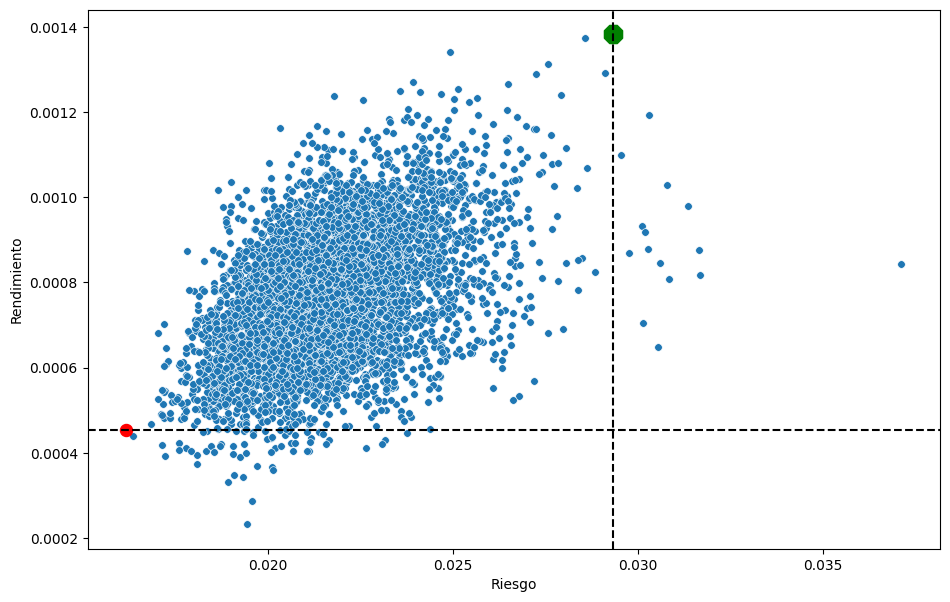

In [23]:
'''matrizPortafolio.plot(x='Riesgo',y='Rendimiento', kind='scatter', figsize=(13,9) )
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='*', s=300)
plt.scatter(x=optimo[1], y=optimo[0], color='green', marker='*', s=300)
plt.savefig('FronteraEficiente', dpi=200)'''


plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Cuadrante óptimo
Selección de los portafolios óptimos cuadrante superior izquierdo

In [24]:
m = matrizPortafolio
m = m[(m["Rendimiento"] >= minimaVarianza[0]) & (m["Riesgo"] <= mayorRendimiento[1])]

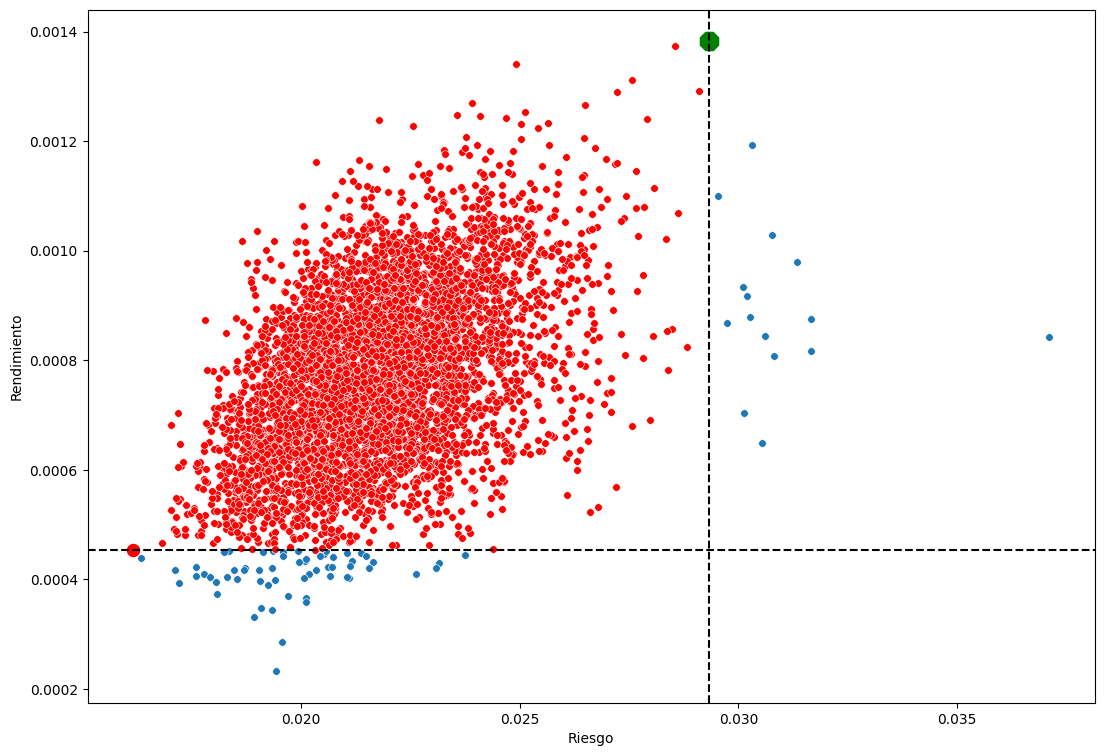

In [25]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=m, x = 'Riesgo', y='Rendimiento', color="red", s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Pendiente óptima

In [26]:
minimaVarianza

Rendimiento    0.000453
Riesgo         0.016163
USD ADBE       0.164109
USD AMD        0.047186
USD BIIB       0.106995
USD INTC       0.199680
USD LCID       0.002448
USD MNST       0.319462
USD NFLX       0.139414
USD NVDA       0.020706
Name: 3512, dtype: float64

In [27]:
# Encontrar la pendiente de la línea recta que cruza los dos puntos.
x1, y1 = minimaVarianza['Riesgo'], minimaVarianza['Rendimiento']
x2, y2 = mayorRendimiento['Riesgo'], mayorRendimiento['Rendimiento']
pendiente = (y2 - y1) / (x2 - x1)
print("Pendiente: ", pendiente)
b = y1 - pendiente * x1
print("Punto de corte", b)


Pendiente:  0.07059601255894676
Punto de corte -0.0006879707141723241


In [28]:
pendiente_optima = pd.DataFrame(columns = m.columns)
for index, row in m.iterrows():
    if row['Rendimiento'] >= pendiente * row['Riesgo'] + b:
       pendiente_optima = pendiente_optima.append(row)

pendiente_optima.reset_index(drop=True, inplace=True) ;

In [29]:
pendiente_optima

,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
0,0.000951,0.020045,0.070236,0.143433,0.122176,0.157266,0.053081,0.213666,0.016850,0.223291
1,0.000846,0.019662,0.121333,0.188907,0.085521,0.122275,0.004702,0.211279,0.102666,0.163318
2,0.000920,0.022345,0.005351,0.230384,0.117062,0.086509,0.057619,0.096892,0.234452,0.171731
3,0.000940,0.020699,0.080673,0.140738,0.202592,0.077050,0.060688,0.149697,0.093193,0.195369
4,0.001041,0.024345,0.245117,0.352206,0.138062,0.001757,0.041208,0.015850,0.018432,0.187369
...,...,...,...,...,...,...,...,...,...,...
1620,0.001032,0.021841,0.079340,0.183941,0.067643,0.107478,0.008394,0.141025,0.147250,0.264928
1621,0.000771,0.018869,0.066856,0.158643,0.191116,0.124413,0.009426,0.213330,0.112924,0.123293
1622,0.000906,0.022313,0.123921,0.086795,0.037465,0.104516,0.097958,0.102175,0.228071,0.219098
1623,0.000945,0.023078,0.053826,0.067456,0.174970,0.064690,0.189807,0.133365,0.128557,0.187330


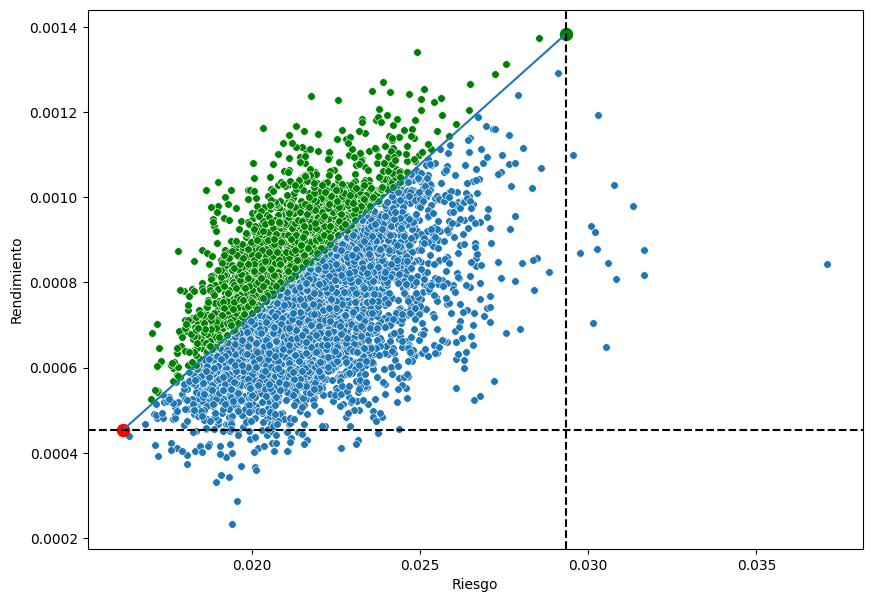

In [30]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=pendiente_optima, x = 'Riesgo', y='Rendimiento', color="green", s=30)


# Puntos de menor riesgo(rojo) y mayor retorno(Verde)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='.', s=300)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)

plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])


plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Definición de carteras según perfil de riesgo del inversor

 Borramos las carteras que no vamos a tomar

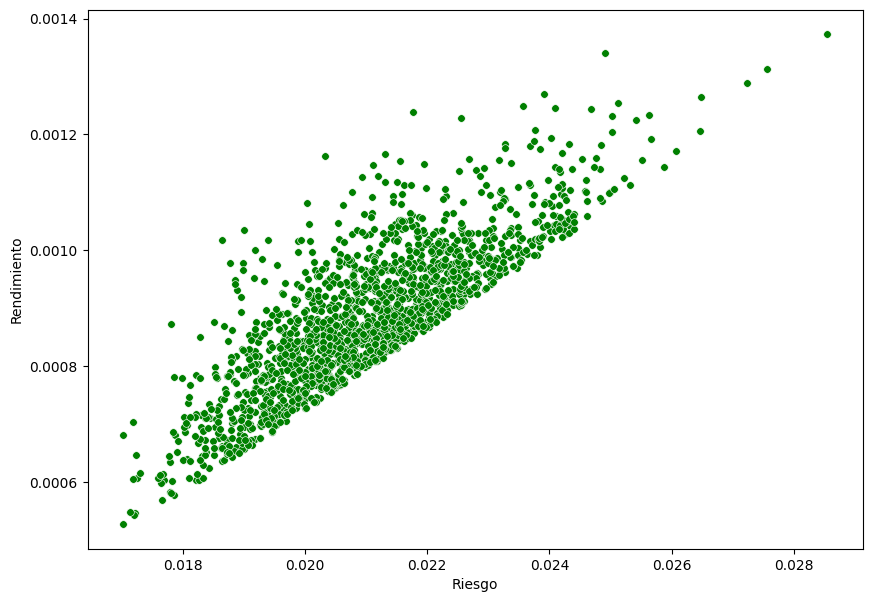

In [31]:
plt.figure(figsize=(10,7))
sns.scatterplot(data= pendiente_optima, x = 'Riesgo', y='Rendimiento',color='green', s=30)

#plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])
#plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
#plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

#### Definir los 3 perfiles
Dividir en 3 sectores del gráfico según perfil del riesgo

In [32]:
division = (pendiente_optima['Riesgo'].max()  - pendiente_optima['Riesgo'].min()) / 3
division
bajo = pendiente_optima['Riesgo'].min() + division
medio = bajo + division

In [33]:
# Perfil Bajo
perfil_bajo = pendiente_optima[(pendiente_optima["Riesgo"] >= pendiente_optima["Riesgo"].min()) &
                 (pendiente_optima["Riesgo"] <= bajo)]
maximo_perfil_bajo = perfil_bajo.loc[perfil_bajo['Rendimiento'].idxmax()]
maximo_perfil_bajo_mensual = maximo_perfil_bajo.copy()
print(f"Máximo rendimiento para perfil bajo: \n {maximo_perfil_bajo} \n ---------------")

# Perfil Medio
perfil_medio = pendiente_optima[(pendiente_optima["Riesgo"] >= bajo) &
                 (pendiente_optima["Riesgo"] <= medio)]
maximo_perfil_medio = perfil_medio.loc[perfil_medio['Rendimiento'].idxmax()]
maximo_perfil_medio_mensual = maximo_perfil_medio.copy()
print(f"Máximo rendimiento para perfil Medio: \n {maximo_perfil_medio} \n ---------------")

# Perfil Alto
perfil_alto = pendiente_optima[pendiente_optima["Riesgo"] >= medio]
maximo_perfil_alto = perfil_alto.loc[perfil_alto['Rendimiento'].idxmax()]
maximo_perfil_alto_mensual = maximo_perfil_alto.copy()
print(f"Máximo rendimiento para perfil Alto: \n {maximo_perfil_alto} \n ---------------")

Máximo rendimiento para perfil bajo: 
 Rendimiento    0.001163
Riesgo         0.020330
USD ADBE       0.009758
USD AMD        0.148935
USD BIIB       0.110900
USD INTC       0.063679
USD LCID       0.017924
USD MNST       0.304520
USD NFLX       0.048955
USD NVDA       0.295329
Name: 1528, dtype: float64 
 ---------------
Máximo rendimiento para perfil Medio: 
 Rendimiento    0.001270
Riesgo         0.023909
USD ADBE       0.011008
USD AMD        0.194757
USD BIIB       0.134866
USD INTC       0.002537
USD LCID       0.016432
USD MNST       0.100920
USD NFLX       0.194586
USD NVDA       0.344894
Name: 750, dtype: float64 
 ---------------
Máximo rendimiento para perfil Alto: 
 Rendimiento    0.001373
Riesgo         0.028550
USD ADBE       0.022946
USD AMD        0.141438
USD BIIB       0.140864
USD INTC       0.012201
USD LCID       0.261823
USD MNST       0.060506
USD NFLX       0.005593
USD NVDA       0.354629
Name: 1486, dtype: float64 
 ---------------


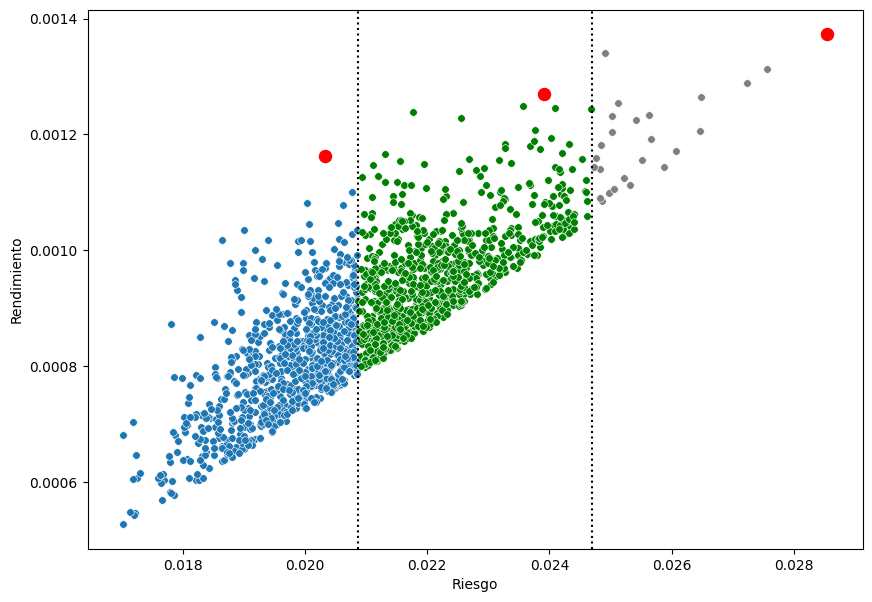

In [34]:
plt.figure(figsize=(10,7))

sns.scatterplot(data= perfil_bajo, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data= perfil_medio, x = 'Riesgo', y='Rendimiento', color='green', s=30)
sns.scatterplot(data= perfil_alto, x = 'Riesgo', y='Rendimiento', color='grey', s=30)

# Lineas verticales
plt.axvline(x=bajo, color='black', linestyle=':')
plt.axvline(x=medio, color='black', linestyle=':')

# Puntos máximos por perfil
plt.scatter(x=maximo_perfil_bajo[1], y=maximo_perfil_bajo[0], color='red', marker='.', s=300)
plt.scatter(x=maximo_perfil_medio[1], y=maximo_perfil_medio[0], color='red', marker='.', s=300)
plt.scatter(x=maximo_perfil_alto[1], y=maximo_perfil_alto[0], color='red', marker='.', s=300)

plt.show()

In [35]:
maximo_perfil_bajo = pd.DataFrame(maximo_perfil_bajo)
column_name = maximo_perfil_bajo.columns[0]
maximo_perfil_bajo.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_bajo['Total %'] = round(maximo_perfil_bajo['Total %'] * 100,2)
maximo_perfil_bajo['Total %'] = maximo_perfil_bajo['Total %'].astype(str) + " %"



In [36]:
maximo_perfil_medio = pd.DataFrame(maximo_perfil_medio)
column_name = maximo_perfil_medio.columns[0]
maximo_perfil_medio.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_medio['Total %'] = round(maximo_perfil_medio['Total %'] * 100,2)
maximo_perfil_medio['Total %'] = maximo_perfil_medio['Total %'].astype(str) + " %"


In [37]:
maximo_perfil_alto = pd.DataFrame(maximo_perfil_alto)
column_name = maximo_perfil_alto.columns[0]
maximo_perfil_alto.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_alto['Total %'] = round(maximo_perfil_alto['Total %'] * 100,2)
maximo_perfil_alto['Total %'] = maximo_perfil_alto['Total %'].astype(str) + " %"

In [38]:
print(f'\n--------------------------------------------------------\nA continuación el rendimiento DIARIO de cada cartera:\n--------------------------------------------------------\n')
print("INVERSIÓN TOTAL PARA PERFIL BAJO: \n")
display(maximo_perfil_bajo.T)
print("\nINVERSIÓN TOTAL PARA PERFIL MEDIO: \n")
display(maximo_perfil_medio.T)
print("\nINVERSIÓN TOTAL PARA PERFIL ALTO: \n")
display(maximo_perfil_alto.T)


--------------------------------------------------------
A continuación el rendimiento DIARIO de cada cartera:
--------------------------------------------------------

INVERSIÓN TOTAL PARA PERFIL BAJO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,0.12 %,2.03 %,0.98 %,14.89 %,11.09 %,6.37 %,1.79 %,30.45 %,4.9 %,29.53 %



INVERSIÓN TOTAL PARA PERFIL MEDIO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,0.13 %,2.39 %,1.1 %,19.48 %,13.49 %,0.25 %,1.64 %,10.09 %,19.46 %,34.49 %



INVERSIÓN TOTAL PARA PERFIL ALTO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,0.14 %,2.86 %,2.29 %,14.14 %,14.09 %,1.22 %,26.18 %,6.05 %,0.56 %,35.46 %


In [39]:
# Perfil Bajo Mensual

maximo_perfil_bajo_mensual = pd.DataFrame(maximo_perfil_bajo_mensual)

column_name = maximo_perfil_bajo_mensual.columns[0]
maximo_perfil_bajo_mensual.rename(columns={column_name: "Total %"}, inplace=True)

maximo_perfil_bajo_mensual = maximo_perfil_bajo_mensual.T


# Perfil Medio Mensual

maximo_perfil_medio_mensual = pd.DataFrame(maximo_perfil_medio_mensual)

column_name = maximo_perfil_medio_mensual.columns[0]
maximo_perfil_medio_mensual.rename(columns={column_name: "Total %"}, inplace=True)

maximo_perfil_medio_mensual = maximo_perfil_medio_mensual.T

# Perfil Alto Mensual

maximo_perfil_alto_mensual = pd.DataFrame(maximo_perfil_alto_mensual)

column_name = maximo_perfil_alto_mensual.columns[0]
maximo_perfil_alto_mensual.rename(columns={column_name: "Total %"}, inplace=True)

maximo_perfil_alto_mensual = maximo_perfil_alto_mensual.T

# Promedio de días de los meses en el año
dias_de_meses = 30.41

maximo_perfil_bajo_mensual['Rendimiento'] = ((1 + maximo_perfil_bajo_mensual['Rendimiento'] ) ** dias_de_meses - 1)
maximo_perfil_medio_mensual['Rendimiento'] = ((1 + maximo_perfil_medio_mensual['Rendimiento'] ) ** dias_de_meses - 1)
maximo_perfil_alto_mensual['Rendimiento'] = ((1 + maximo_perfil_alto_mensual['Rendimiento'] ) ** dias_de_meses - 1)

maximo_perfil_bajo_mensual.loc['Total %'] = maximo_perfil_bajo_mensual.loc['Total %'].apply(lambda x: "{:.2f}%".format(x * 100))
maximo_perfil_medio_mensual.loc['Total %'] = maximo_perfil_medio_mensual.loc['Total %'].apply(lambda x: "{:.2f}%".format(x * 100))
maximo_perfil_alto_mensual.loc['Total %'] = maximo_perfil_alto_mensual.loc['Total %'].apply(lambda x: "{:.2f}%".format(x * 100))



In [40]:
print(f'\n--------------------------------------------------------\nA continuación el rendimiento MENSUAL de cada cartera:\n--------------------------------------------------------\n')
print("INVERSIÓN TOTAL PARA PERFIL BAJO: \n")
display(maximo_perfil_bajo_mensual)
print("\nINVERSIÓN TOTAL PARA PERFIL MEDIO: \n")
display(maximo_perfil_medio_mensual)
print("\nINVERSIÓN TOTAL PARA PERFIL ALTO: \n")
display(maximo_perfil_alto_mensual)


--------------------------------------------------------
A continuación el rendimiento MENSUAL de cada cartera:
--------------------------------------------------------

INVERSIÓN TOTAL PARA PERFIL BAJO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,3.60%,2.03%,0.98%,14.89%,11.09%,6.37%,1.79%,30.45%,4.90%,29.53%



INVERSIÓN TOTAL PARA PERFIL MEDIO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,3.94%,2.39%,1.10%,19.48%,13.49%,0.25%,1.64%,10.09%,19.46%,34.49%



INVERSIÓN TOTAL PARA PERFIL ALTO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,4.26%,2.86%,2.29%,14.14%,14.09%,1.22%,26.18%,6.05%,0.56%,35.46%


# Modelo predictivo

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para AMD: 2.6756063615914583


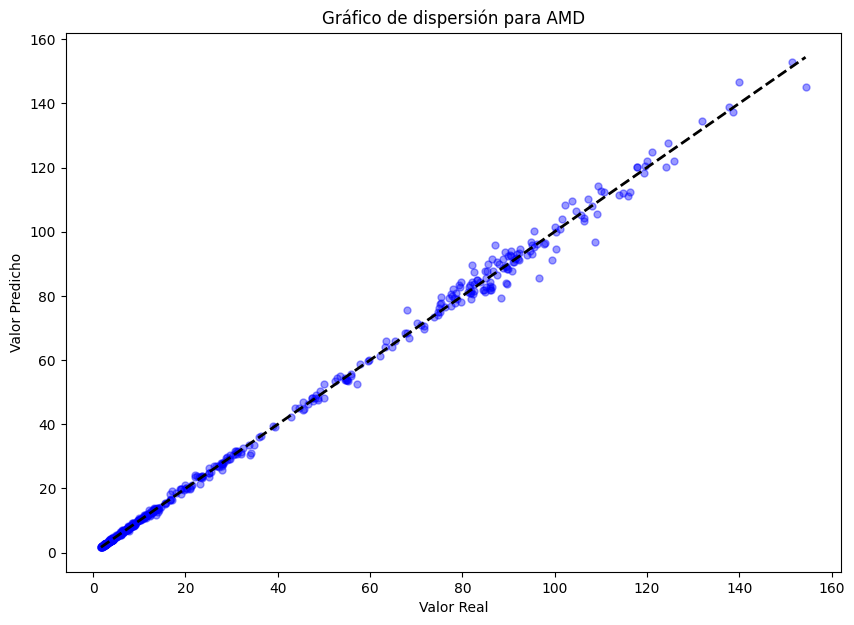

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para LCID: 4.50540144712858


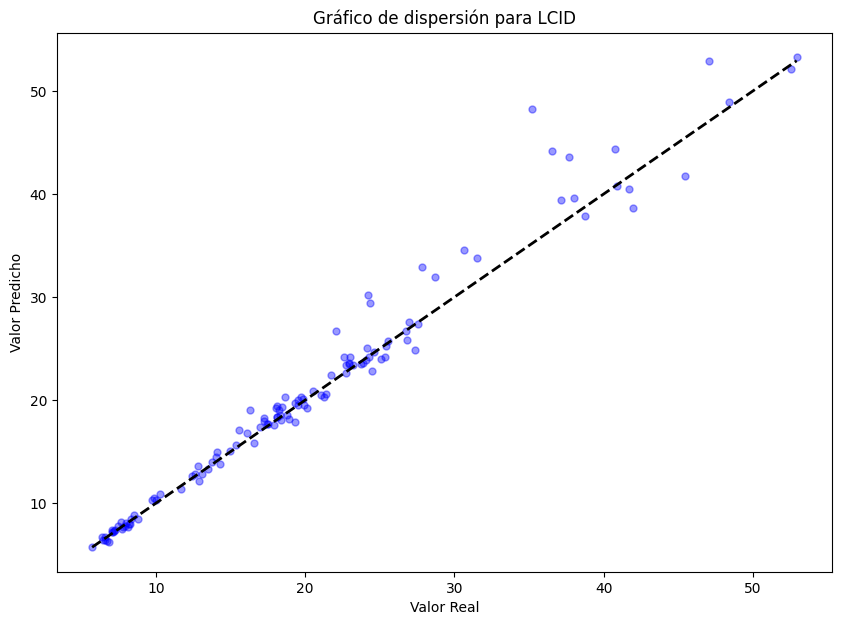

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para MNST: 0.26717081862744285


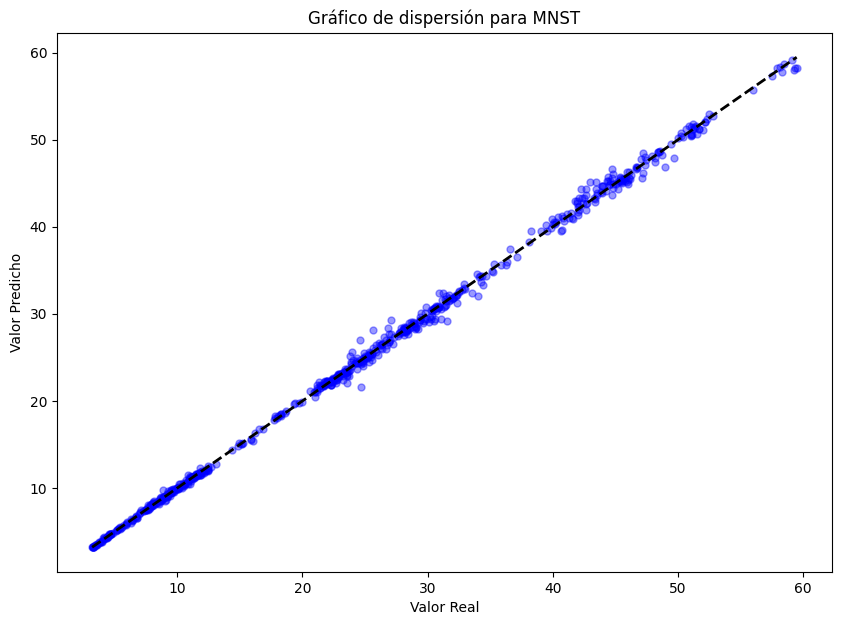

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para BIIB: 72.16648925070537


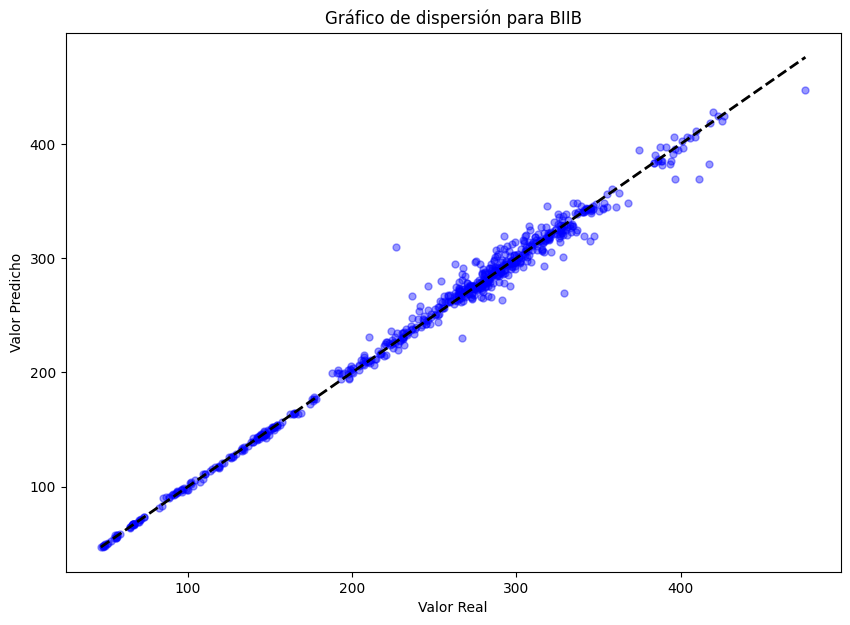

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para NVDA: 12.997667723985847


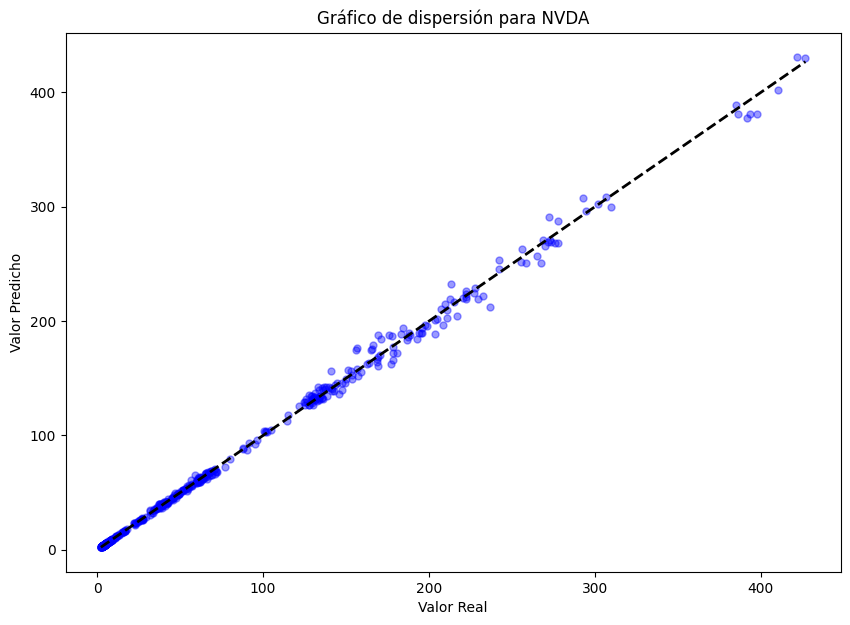

,Activo,Precio Predicho
0,AMD,112.797998
1,LCID,5.692500
2,MNST,59.182599
3,BIIB,294.840201
4,NVDA,430.810801


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

predictions_df = pd.DataFrame(columns=['Activo', 'Precio Predicho'])

for activo in activos:

    # Descargar los datos históricos del activo utilizando yfinance
    ''' Tomamos un set de datos mayor al anterior análisis, ya que esto
    ayuda al modelo a ser entrenado
    '''
    data = yf.download(activo, start='2010-01-01', end=today)

    # Calcular características técnicas adicionales
    ''' crea una ventana deslizante de tamaño 10, 30, 60, 100,
    lo que significa, que por ejemplo, se calcula la media de los
    últimos 30 períodos SMA_30 (en este caso, 30 días) de datos.
    '''
    data['SMA_10'] = data['Close'].rolling(window=10).mean()
    data['SMA_30'] = data['Close'].rolling(window=30).mean()
    data['SMA_60'] = data['Close'].rolling(window=60).mean()
    data['SMA_100'] = data['Close'].rolling(window=100).mean()

    # Eliminar filas con valores faltantes
    data.dropna(inplace=True)

    # Seleccionar características y objetivo
    features = ['SMA_10', 'SMA_30', 'SMA_60', 'SMA_100']
    target = 'Close'

    '''
    Se asignan las X e Y de los train y tests.
    En el test_size=0.2 : Usamos el 80% de los datos
    para el entrenamiento y 20% de los datos para el test
    '''
    X = data[features].values
    y = data[target].values

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Entrenar un modelo de árbol de decisión
    regressor = RandomForestRegressor(n_estimators=100, random_state=0)
    regressor.fit(X_train, y_train)

    # Predecir los precios de las acciones utilizando los datos de prueba
    y_pred = regressor.predict(X_test)

    # Evaluar la precisión del modelo utilizando el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Error cuadrático medio para {activo}: {mse}")

    plt.figure(figsize=(10,7))
    plt.scatter(y_test, y_pred, color='blue', marker='.', alpha=0.4, s=100)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Predicho')
    plt.title(f"Gráfico de dispersión para {activo}")
    plt.show()

    # Obtener los datos de características técnicas para la última fecha disponible
    last_date = data.index[-1]
    next_month = last_date + timedelta(days=30)
    next_month_data = data.loc[last_date][features].values.reshape(1, -1)

    # Predecir el precio de la acción para el mes siguiente
    next_month_price = regressor.predict(next_month_data)

     # Agregar el precio predicho y el nombre del activo al DataFrame
    predictions_df = predictions_df.append({'Activo': activo, 'Precio Predicho': next_month_price[0]}, ignore_index=True)

display(predictions_df)

In [57]:
predictions_df

,Activo,Precio Predicho
0,AMD,112.797998
1,LCID,5.692500
2,MNST,59.182599
3,BIIB,294.840201
4,NVDA,430.810801


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definir la lista de acciones
activos = ["AMD", "LCID", "MNST", "BIIB", "NVDA"]

# Obtener los datos históricos de las acciones
data = yf.download(activos, start="2020-01-01", end="2022-12-31")["Adj Close"]

# Calcular los rendimientos diarios
returns = data.pct_change()

# Eliminar la primera fila (NaN) de los rendimientos
returns = returns.dropna()

# Definir la columna de predicción
target_column = "LCID"

# Dividir los datos en conjunto de entrenamiento y prueba
X = returns.drop(target_column, axis=1)
y = returns[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones para el próximo mes
next_month_data = yf.download(activos, start="2022-12-01", end="2022-12-31")["Adj Close"]
next_month_returns = next_month_data.pct_change().dropna()
next_month_features = next_month_returns.drop(target_column, axis=1)
print(next_month_features)
next_month_predictions = model.predict(next_month_features.iloc[:, :4].values)

# Imprimir las predicciones
print("Predicción de precio para el próximo mes:")
print(f"{target_column}: {next_month_predictions[0]}")

# Evaluar el rendimiento del modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio en el conjunto de prueba:", mse)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
                 AMD      BIIB      MNST      NVDA
Date                                              
2022-12-02 -0.032266 -0.009773  0.007651 -0.015115
2022-12-05 -0.018138 -0.020575 -0.017974 -0.015762
2022-12-06 -0.045504 -0.004372 -0.007145 -0.037508
2022-12-07 -0.001850  0.002333 -0.002070  0.008319
2022-12-08  0.004705 -0.010440  0.003062  0.065074
2022-12-09 -0.026678 -0.012902 -0.014773 -0.009785
2022-12-12  0.030325  0.018292  0.007797  0.031410
2022-12-13  0.013867  0.002237 -0.003769  0.030624
2022-12-14 -0.037962 -0.007520  0.014536 -0.022023
2022-12-15 -0.034818 -0.019408 -0.022080 -0.040851
2022-12-16 -0.016834  0.005433  0.011340 -0.022475
2022-12-19 -0.012536 -0.002105 -0.003572 -0.019130
2022-12-20  0.007122  0.011006  0.007369 -0.010397
2022-12-21  0.040430 -0.002261  0.007809  0.025863
2022-12-22 -0.056442 -0.021788 -0.011182 -0.07

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
